In [2]:
#네이버
import pandas as pd 

#해당 링크는 한국거래소에서 상장법인목록을 엑셀로 다운로드하는 링크입니다.
#다운로드와 동시에 Pandas에 excel 파일이 load가 되는 구조입니다.
stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 
#stock_code.head()

# 데이터에서 정렬이 따로 필요하지는 않지만 테스트겸 Pandas sort_values를 이용하여 정렬을 시도해봅니다.
stock_code.sort_values(['상장일'], ascending=True)

# 필요한 것은 "회사명"과 "종목코드" 이므로 필요없는 column들은 제외
stock_code = stock_code[['회사명', '종목코드']] 

# 한글 컬럼명을 영어로 변경 
stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
#stock_code.head()

# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
stock_code.code = stock_code.code.map('{:06d}'.format) 

company='LG화학' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거

df_naver = pd.DataFrame()
for page in range(1,123):
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    df_naver = df_naver.append(pd.read_html(url, header=0)[0], ignore_index=True)
    

# df.dropna()를 이용해 결측값 있는 행 제거 
df_naver = df_naver.dropna() 

# 한글로 된 컬럼명을 영어로 바꿔줌 
df_naver = df_naver.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df_naver[['close', 'diff', 'open', 'high', 'low', 'volume']] = df_naver[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df_naver['date'] = pd.to_datetime(df_naver['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df_naver = df_naver.sort_values(by=['date'], ascending=True) 

# 상위 5개 데이터 확인 
df_naver

,date,close,diff,open,high,low,volume
1828,2015-11-13,299500,1500,295000,305000,294000,228823
1827,2015-11-16,294000,5500,294000,298000,293000,140792
1826,2015-11-17,313500,19500,301000,316500,298500,336995
1825,2015-11-18,313000,500,313500,319000,310000,174571
1824,2015-11-19,326000,13000,317500,327500,317000,319695
...,...,...,...,...,...,...,...
5,2020-10-28,642000,10000,647000,647000,626000,368105
4,2020-10-29,651000,9000,629000,654000,629000,386081
3,2020-10-30,611000,40000,647000,648000,611000,820454
2,2020-11-02,623000,12000,609000,625000,588000,505856


In [ ]:
#야후

In [1]:
stockname = str(input())

LG화학


In [3]:
!pip install pandas-datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)


In [2]:
import pandas_datareader as pdr
import pandas as pd
# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
# 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code
# excel 파일을 다운로드하는거와 동시에 pandas에 load하기
# 흔히 사용하는 df라는 변수는 data frame을 의미합니다.
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
# data frame정리
code_df = code_df[['회사명', '종목코드']]
# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
# 종목코드는 6자리로 구분되기때문에 0을 채워 6자리로 변경
code_df.code = code_df.code.map('{:06d}'.format)
# ex) 삼성전자의의 코드를 구해보겠습니다.
code = get_code(code_df, stockname)
# yahoo의 주식 데이터 종목은 코스피는 .KS, 코스닥은 .KQ가 붙습니다.
# 삼성전자의 경우 코스피에 상장되어있기때문에 '종목코드.KS'로 처리하도록 한다.
code = code + '.KS'
# get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
df_yahoo = pdr.get_data_yahoo(code)

df_yahoo = df_yahoo[['Open', 'High', 'Low', 'Close', 'Volume']].iloc[:,:4]
df_yahoo

,Open,High,Low,Close
Date,,,,
2015-11-11,295500.0,299000.0,286500.0,296500.0
2015-11-12,298000.0,301500.0,294500.0,298000.0
2015-11-13,295000.0,305000.0,294000.0,299500.0
2015-11-16,294000.0,298000.0,293000.0,294000.0
2015-11-17,301000.0,316500.0,298500.0,313500.0
...,...,...,...,...
2020-11-03,630000.0,659000.0,628000.0,656000.0
2020-11-04,662000.0,673000.0,645000.0,650000.0
2020-11-05,663000.0,677000.0,656000.0,677000.0


In [7]:
df_yahoo['Close'].values[::-1]

array([734000., 720000., 677000., ..., 299500., 298000., 296500.])

In [9]:
df_yahoo.to_csv('051910.csv', sep=',', na_rep='NaN')

In [ ]:
C:\Users\ahn01\StockMarketPred\051910.csv

In [11]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


[[734000.]
 [720000.]
 [677000.]
 ...
 [299500.]
 [298000.]
 [296500.]]
1097 122
Epoch 1/100
1095/1095 - 2s - loss: 0.0311
Epoch 2/100
1095/1095 - 3s - loss: 0.0086
Epoch 3/100
1095/1095 - 3s - loss: 7.8647e-04
Epoch 4/100
1095/1095 - 3s - loss: 3.5122e-04
Epoch 5/100
1095/1095 - 3s - loss: 3.4655e-04
Epoch 6/100
1095/1095 - 2s - loss: 3.6200e-04
Epoch 7/100
1095/1095 - 2s - loss: 3.5792e-04
Epoch 8/100
1095/1095 - 2s - loss: 3.4712e-04
Epoch 9/100
1095/1095 - 3s - loss: 3.6032e-04
Epoch 10/100
1095/1095 - 2s - loss: 3.5100e-04
Epoch 11/100
1095/1095 - 3s - loss: 3.5466e-04
Epoch 12/100
1095/1095 - 3s - loss: 3.5186e-04
Epoch 13/100
1095/1095 - 3s - loss: 3.5264e-04
Epoch 14/100
1095/1095 - 3s - loss: 3.5393e-04
Epoch 15/100
1095/1095 - 2s - loss: 3.5175e-04
Epoch 16/100
1095/1095 - 2s - loss: 3.4913e-04
Epoch 17/100
1095/1095 - 3s - loss: 3.5187e-04
Epoch 18/100
1095/1095 - 3s - loss: 3.6127e-04
Epoch 19/100
1095/1095 - 2s - loss: 3.5515e-04
Epoch 20/100
1095/1095 - 3s - loss: 3.4752e

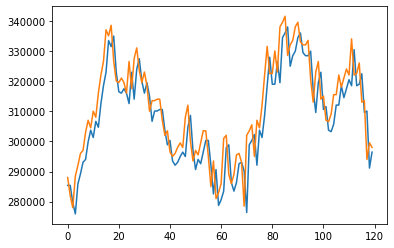

In [8]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
 
look_back = 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
 
# file loader
#sydtpath = "D:sydt"
#naturalEndoTekCode = "A168330"
#fullpath = sydtpath + os.path.sep + naturalEndoTekCode + '.csv'
fullpath = 'C:\\Users\\ahn01\\StockMarketPred\\051910.csv'
pandf = pd.read_csv(fullpath, index_col="Date")
 
# convert nparray
nparr = pandf['Close'].values[::-1]
nparr.astype('float32')
nparr = nparr.reshape(-1,1)
print(nparr)
 
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr)
 
# split train, test
train_size = int(len(nptf) * 0.9)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))
 
# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
 
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
 
# simple lstm network learning
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
 
# make prediction
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)
 
# predict last value (or tomorrow?)
lastX = nptf[-1]
lastX = np.reshape(lastX, (1, 1, 1))
lastY = model.predict(lastX)
lastY = scaler.inverse_transform(lastY)
print('Predict the Close value of final day: %d' % lastY)  # 데이터 입력 마지막 다음날 종가 예측
 
# plot
plt.plot(testPredict)
plt.plot(testY)
plt.show()

In [3]:
!pip install tensorflow

  Using cached tensorflow-2.3.1-cp38-cp38-win_amd64.whl (342.5 MB)


In [ ]:
a